### formatting and saving the 3D data

In [1]:
from __future__ import print_function
from scipy.spatial import ConvexHull
from skimage.transform import downscale_local_mean
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from skimage.measure import regionprops
import numpy as np
import matplotlib.pyplot as plt
import os as os
from tqdm import tqdm as tqdm_base
def tqdm(*args, **kwargs):
    if hasattr(tqdm_base, '_instances'):
        for instance in list(tqdm_base._instances):
            tqdm_base._decr_instances(instance)
    return tqdm_base(*args, **kwargs)
from scipy.io import loadmat
import numpy as np
import pandas as pd

In [2]:
# load the 2D data

# process the 3D data and plot some examples + table

# combine the 2D and 3D data into final file 

In [1]:


x = loadmat('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/sequentially_encoded_Wang_et_al_2018/20180123_BS10_light.mat')
geneinfo = pd.read_csv('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/sequentially_encoded_Wang_et_al_2018/gene_names.csv', header = 0)

NameError: name 'loadmat' is not defined

In [4]:
def normalize(counts):

    cts = np.array(counts)
    #get_indices = np.argwhere(np.array(np.where(np.sum(cts, axis = 1)!=0)).flatten())
    cts = cts + 0.01
    cts = cts[np.array(np.where(np.sum(cts, axis = 1)!=0)).flatten(),:] # remove cells, where total library count is zero
    #cell_median = np.median(cts, axis = 1) # get row-wise median
    cell_sum = np.sum(cts, axis = 1) # get row-wise sum
    counts_out = cts/(np.tile(cell_sum, (cts.shape[1],1)).transpose()) # divide each column by row-wise sum

    return counts_out

In [ ]:
x = loadmat('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/sequentially_encoded_Wang_et_al_2018/20180123_BS10_light.mat')
geneinfo = pd.read_csv('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/sequentially_encoded_Wang_et_al_2018/gene_names.csv', header = 0)

norm_x = normalize(x['expr'])

c = np.matrix(x['goodLocs'])

out = pd.concat([pd.DataFrame(norm_x), pd.DataFrame(c)],axis=1)

out.columns = np.append(np.array(geneinfo[['gene']]).flatten(),(('x','y','z')))

In [5]:
norm_x = normalize(x['expr'])

In [6]:
c = np.matrix(x['goodLocs'])
#coords = c[index.flatten(),:]

In [7]:

out = pd.concat([pd.DataFrame(norm_x), pd.DataFrame(c)],axis=1)

In [8]:
out.columns = np.append(np.array(geneinfo[['gene']]).flatten(),(('x','y','z')))

<IPython.core.display.Javascript object>


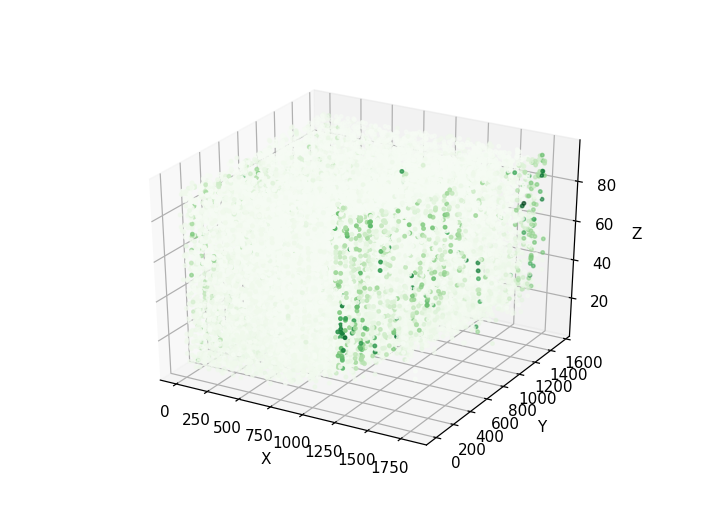

In [21]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(out[['x']], out[['y']], out[['z']], cmap = 'Greens',c=np.array(out[['Ctgf']]).flatten(), marker='.', s =20)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [28]:
# get density 

f = pd.DataFrame(['3D', '33598', 'PFC', '28', '1.4mm x 1.7mm, 0.1mm', '141168 cells per mm^3']).transpose()
f.columns = ['dataset', 'Ncells', 'region', 'Ngenes', 'dimensions', 'density']

# Now combine the 3D dataset with the 2D datasets 

In [32]:
np.savez('processed_3d_data.npz', np.array(out))